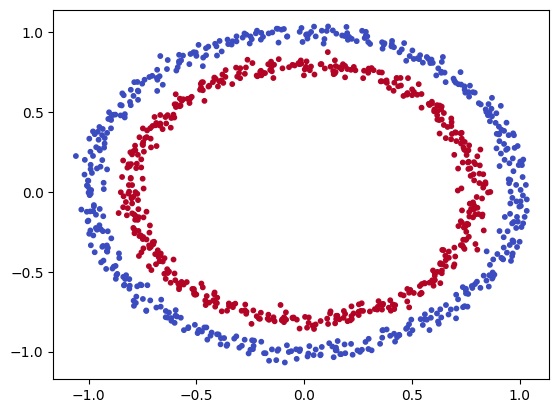

In [4]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)

In [5]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from torch import nn
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_v3 = CircleModelV3()


In [9]:
n_epochs = 1000

loss_fun = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_v3.parameters(), lr=0.1)

for epoch in range(n_epochs):
    model_v3.train()
    y_logits = model_v3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fun(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_v3.eval()
    with torch.inference_mode():
        test_logits = model_v3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fun(test_logits, y_test)

    if epoch % 100 == 0:
        acc = (test_pred == y_test).sum() / len(test_pred)
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}")

Epoch: 0 | Loss: 0.70296 | Test Loss: 0.69980 | Accuracy: 0.50
Epoch: 100 | Loss: 0.68597 | Test Loss: 0.68643 | Accuracy: 0.55
Epoch: 200 | Loss: 0.68039 | Test Loss: 0.68142 | Accuracy: 0.68
Epoch: 300 | Loss: 0.67234 | Test Loss: 0.67421 | Accuracy: 0.62
Epoch: 400 | Loss: 0.66053 | Test Loss: 0.66418 | Accuracy: 0.59
Epoch: 500 | Loss: 0.64324 | Test Loss: 0.65056 | Accuracy: 0.57
Epoch: 600 | Loss: 0.61530 | Test Loss: 0.62761 | Accuracy: 0.58
Epoch: 700 | Loss: 0.55920 | Test Loss: 0.57228 | Accuracy: 0.75
Epoch: 800 | Loss: 0.46665 | Test Loss: 0.47682 | Accuracy: 0.94
Epoch: 900 | Loss: 0.34484 | Test Loss: 0.36118 | Accuracy: 1.00


In [10]:
def relu(x):
    return torch.maximum(torch.tensor(0.), x)

relu(torch.tensor([-1, 0, 1, 2, 3]))

tensor([0., 0., 1., 2., 3.])